/tmp/ipykernel_1015326/511989769.py:64: RuntimeWarning: divide by zero encountered in log
  y1 = -8.314e-3*298.15*np.log(CH4_CH4_g*10/9)
/tmp/ipykernel_1015326/511989769.py:91: RuntimeWarning: divide by zero encountered in log
  y2 = -8.314e-3*298.15*np.log(CH3OH_CH3OH_g*10/9)+0.05
/tmp/ipykernel_1015326/511989769.py:118: RuntimeWarning: divide by zero encountered in log
  y3 = -8.314e-3*298.15*np.log(CH4_CH3OH_g*10/9)+0.32
/tmp/ipykernel_1015326/511989769.py:145: RuntimeWarning: divide by zero encountered in log
  y4 = -8.314e-3*298.15*np.log(HCONH2_HCONH2_g*10/9)
/tmp/ipykernel_1015326/511989769.py:180: RuntimeWarning: divide by zero encountered in log
  ax[1, 1].plot(ave_by_n(CH4_CH4_r, 10), -8.314e-3*298.15*np.log(ave_by_n(CH4_CH4_g, 10)*10/9), label=r'CH$_4$-CH$_4$', color=clist[0], linewidth=1.5)
/tmp/ipykernel_1015326/511989769.py:184: RuntimeWarning: divide by zero encountered in log
  ax[1, 1].plot(ave_by_n(CH3OH_CH3OH_r, 10), -8.314e-3*298.15*np.log(ave_by_n(CH3OH_CH3OH_g, 10

0.3217583559777101 0.04529818699936571
0.36262038105740807 0.08189566619829473
0.3448149153441036 0.04911996624156864
0.2977660582231537 0.0821978712027052
0.3317399276505939 0.06462792266048357


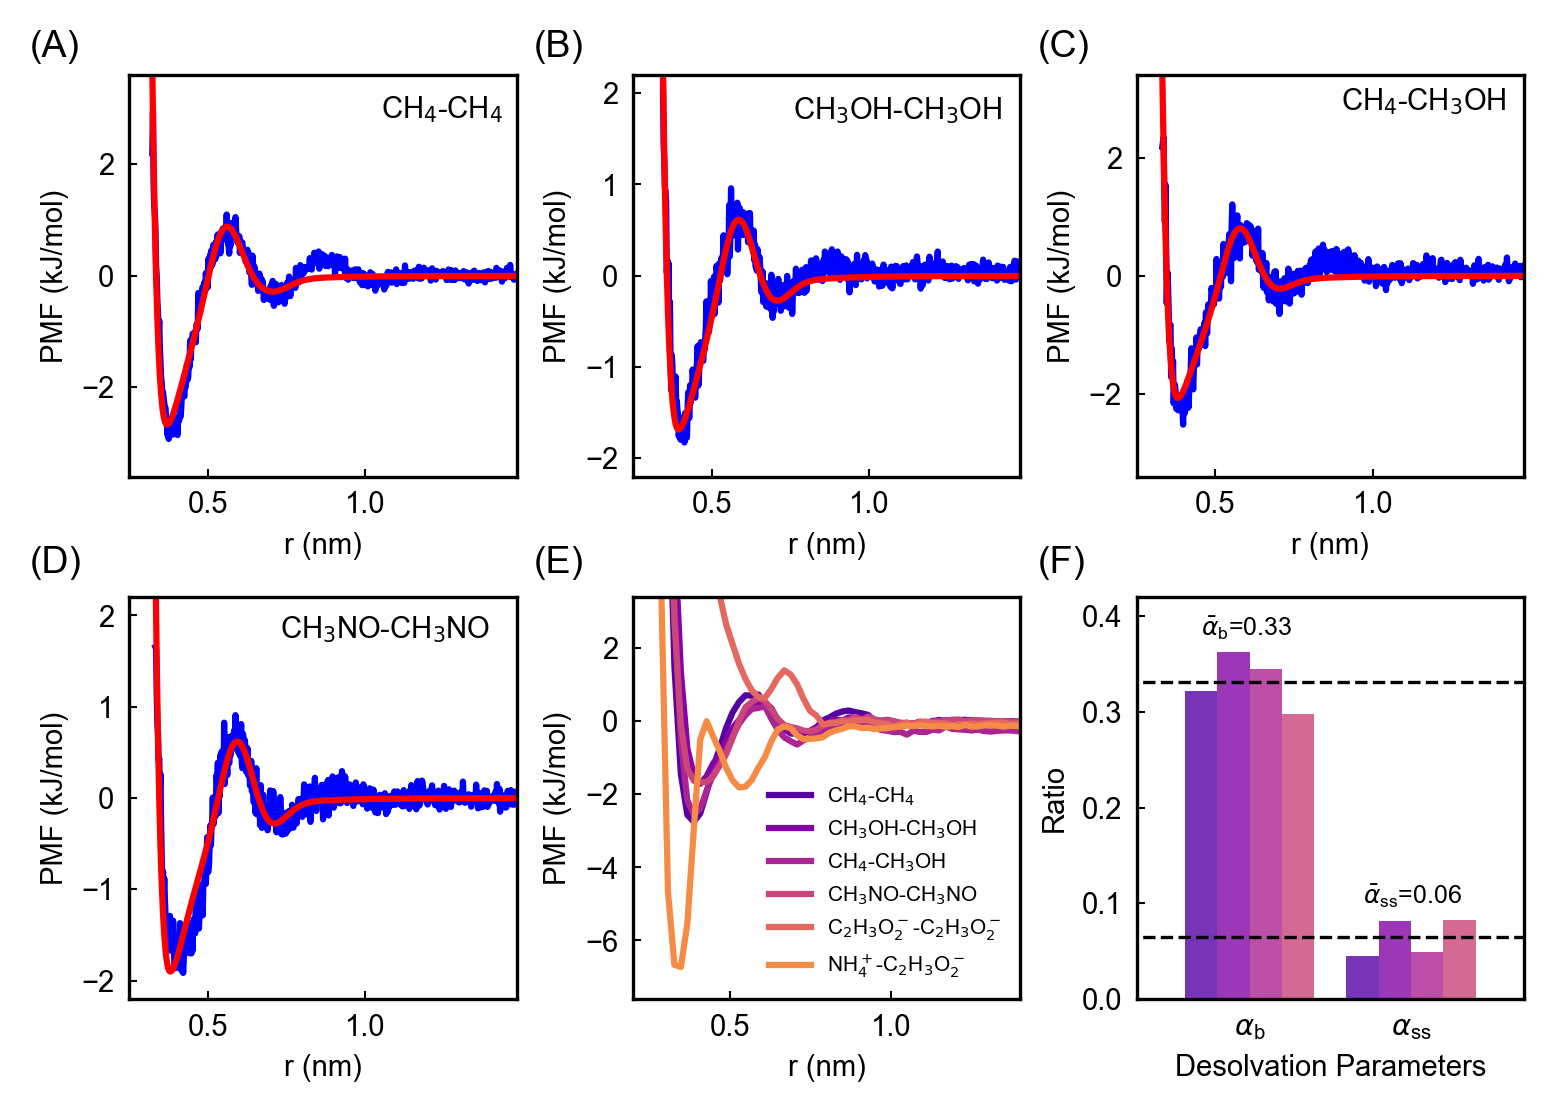

In [39]:
# Fig.S1

# Supplementary fig.1 
# Usage: this script determines the value of alpha_b(=eb/eh) and alpha_w(=ew/eh)

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy import optimize

def des_CH4(r, sigma, eh, eb, ew, dw, hw):
	lam = 0.649
	rm = 2**(1. / 6.) * sigma
	rb, rw = rm + hw, rm + dw
	varb, varw = 0.005, 0.005
	HPS = np.piecewise(r, [r<rm, r>=rm], [lambda r: 4*eh*((sigma/r)**12-(sigma/r)**6)+(1-lam)*eh, lambda r: lam*(4*eh*((sigma/r)**12-(sigma/r)**6))])
	V = HPS + eb * np.exp(-(r-rb)**2 / varb) - ew * np.exp(-(r-rw)**2 / varw)
	return V

def des_CH3OH(r, sigma, eh, eb, ew, dw, hw):
	lam = 0.595
	rm = 2**(1. / 6.) * sigma
	rb, rw = rm + hw, rm + dw
	varb, varw = 0.005, 0.005
	HPS = np.piecewise(r, [r<rm, r>=rm], [lambda r: 4*eh*((sigma/r)**12-(sigma/r)**6)+(1-lam)*eh, lambda r: lam*(4*eh*((sigma/r)**12-(sigma/r)**6))])
	V = HPS + eb * np.exp(-(r-rb)**2 / varb) - ew * np.exp(-(r-rw)**2 / varw)
	return V

def des_CH4CH3OH(r, sigma, eh, eb, ew, dw, hw):
	lam = (0.649 + 0.595) / 2.0
	rm = 2**(1. / 6.) * sigma
	rb, rw = rm + hw, rm + dw
	varb, varw = 0.005, 0.005
	HPS = np.piecewise(r, [r<rm, r>=rm], [lambda r: 4*eh*((sigma/r)**12-(sigma/r)**6)+(1-lam)*eh, lambda r: lam*(4*eh*((sigma/r)**12-(sigma/r)**6))])
	V = HPS + eb * np.exp(-(r-rb)**2 / varb) - ew * np.exp(-(r-rw)**2 / varw)
	return V

def des_HCONH2(r, sigma, eh, eb, ew, dw, hw):
	lam = 0.595 
	rm = 2**(1. / 6.) * sigma
	rb, rw = rm + hw, rm + dw
	varb, varw = 0.005, 0.005
	HPS = np.piecewise(r, [r<rm, r>=rm], [lambda r: 4*eh*((sigma/r)**12-(sigma/r)**6)+(1-lam)*eh, lambda r: lam*(4*eh*((sigma/r)**12-(sigma/r)**6))])
	V = HPS + eb * np.exp(-(r-rb)**2 / varb) - ew * np.exp(-(r-rw)**2 / varw)
	return V

def ave_by_n(array, n):
    nlen = len(array)
    result = np.zeros(int(nlen / n))
    for i in range(n):
        result += array[i:(nlen - nlen%n):n]
    result /= n
    return result

fig, ax = plt.subplots(2, 3, figsize=[6, 4], facecolor='w', dpi=300)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'

# subfigure for CH4-CH4
CH4_CH4_r = np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=0)
CH4_CH4_g = np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=1)
x1 = CH4_CH4_r
y1 = -8.314e-3*298.15*np.log(CH4_CH4_g*10/9)
x1 = x1[np.where(np.abs(y1)<3)]
y1 = y1[np.where(np.abs(y1)<3)]

p1 = [0.36, 4.3, 1.4, 0.2, 0.3, 0.15] # [sigma, eh, eb, ew, d_water, r_water]
p, e = optimize.curve_fit(des_CH4, x1, y1, p1)
sigma, eh, eb, ew, dw, hw = p
ab1, aw1 = eb/eh, ew/eh
print(ab1, aw1)

y11 = []
for r in x1:
	y11.append(des_CH4(r, *p))

ax[0, 0].plot(x1, y1, color='blue')
ax[0, 0].plot(x1, y11, color='red')
ax[0, 0].set_xlim(0.25, 1.48)
ax[0, 0].set_ylim(-3.6, 3.6)
ax[0, 0].tick_params(width=0.5, length=2, labelsize=7, direction='in')
ax[0, 0].set_xlabel('r (nm)', fontsize=7, labelpad=3)
ax[0, 0].set_ylabel('PMF (kJ/mol)', fontsize=7, labelpad=3)
ax[0, 0].text(1.05, 2.83, r'CH$_4$-CH$_4$', fontsize=7)

# subfigure for CH3OH-CH3OH
CH3OH_CH3OH_r = np.loadtxt('../../pmf/CH3OH-CH3OH/rdf.xvg', skiprows=25, usecols=0)
CH3OH_CH3OH_g = np.loadtxt('../../pmf/CH3OH-CH3OH/rdf.xvg', skiprows=25, usecols=1)
x2 = CH3OH_CH3OH_r
y2 = -8.314e-3*298.15*np.log(CH3OH_CH3OH_g*10/9)+0.05
x2 = x2[np.where(np.abs(y2)<2.2)]
y2 = y2[np.where(np.abs(y2)<2.2)]

p2 = [0.36, 2.9, 1.0, 0.2, 0.3, 0.15]
p, e = optimize.curve_fit(des_CH3OH, x2, y2, p2)
sigma, eh, eb, ew, dw, hw = p
ab2, aw2 = eb/eh, ew/eh
print(ab2, aw2)

y22 = []
for r in x2:
	y22.append(des_CH4(r, *p))

ax[0, 1].plot(x2, y2, color='blue')
ax[0, 1].plot(x2, y22, color='red')
ax[0, 1].set_xlim(0.25, 1.48)
ax[0, 1].set_ylim(-2.2, 2.2)
ax[0, 1].tick_params(width=0.5, length=2, labelsize=7, direction='in')
ax[0, 1].set_xlabel('r (nm)', fontsize=7, labelpad=3)
ax[0, 1].set_ylabel('PMF (kJ/mol)', fontsize=7, labelpad=3)
ax[0, 1].text(0.76, 1.72, r'CH$_3$OH-CH$_3$OH', fontsize=7)

# subfigure for CH4-CH3OH
CH4_CH3OH_r = np.loadtxt('../../pmf/CH4-CH3OH/rdf.xvg', skiprows=25, usecols=0)
CH4_CH3OH_g = np.loadtxt('../../pmf/CH4-CH3OH/rdf.xvg', skiprows=25, usecols=1)
x3 = CH4_CH3OH_r
y3 = -8.314e-3*298.15*np.log(CH4_CH3OH_g*10/9)+0.32
x3 = x3[np.where(np.abs(y3)<2.6)]
y3 = y3[np.where(np.abs(y3)<2.6)]

p3 = [0.36, 3.0, 1.0, 0.2, 0.3, 0.15]
p, e = optimize.curve_fit(des_CH4CH3OH, x3, y3, p3)
sigma, eh, eb, ew, dw, hw = p
ab3, aw3 = eb/eh, ew/eh
print(ab3, aw3)

y33 = []
for r in x3:
	y33.append(des_CH4CH3OH(r, *p))

ax[0, 2].plot(x3, y3, color='blue')
ax[0, 2].plot(x3, y33, color='red')
ax[0, 2].set_xlim(0.25, 1.48)
ax[0, 2].set_ylim(-3.4, 3.4)
ax[0, 2].tick_params(width=0.5, length=2, labelsize=7, direction='in')
ax[0, 2].set_xlabel('r (nm)', fontsize=7, labelpad=3)
ax[0, 2].set_ylabel('PMF (kJ/mol)', fontsize=7, labelpad=3)
ax[0, 2].text(0.9, 2.8, r'CH$_4$-CH$_3$OH', fontsize=7)

# subfigure for HCONH2-HCONH2
HCONH2_HCONH2_r = np.loadtxt('../../pmf/HCONH2-HCONH2/rdf.xvg', skiprows=25, usecols=0)
HCONH2_HCONH2_g = np.loadtxt('../../pmf/HCONH2-HCONH2/rdf.xvg', skiprows=25, usecols=1)
x4 = HCONH2_HCONH2_r
y4 = -8.314e-3*298.15*np.log(HCONH2_HCONH2_g*10/9)
x4 = x4[np.where(np.abs(y4)<2)]
y4 = y4[np.where(np.abs(y4)<2)]

p4 = [0.36, 3.0, 1.0, 0.2, 0.3, 0.15]
p, e = optimize.curve_fit(des_HCONH2, x4, y4, p4)
sigma, eh, eb, ew, dw, hw = p
ab4, aw4 = eb/eh, ew/eh
print(ab4, aw4)

y44 = []
for r in x4:
	y44.append(des_CH4CH3OH(r, *p))

ax[1, 0].plot(x4, y4, color='blue')
ax[1, 0].plot(x4, y44, color='red')
ax[1, 0].set_xlim(0.25, 1.48)
ax[1, 0].set_ylim(-2.2, 2.2)
ax[1, 0].tick_params(width=0.5, length=2, labelsize=7, direction='in')
ax[1, 0].set_xlabel('r (nm)', fontsize=7, labelpad=3)
ax[1, 0].set_ylabel('PMF (kJ/mol)', fontsize=7, labelpad=3)
ax[1, 0].text(0.73, 1.75, r'CH$_3$NO-CH$_3$NO', fontsize=7)

abm, awm = (ab1+ab2+ab3+ab4)/4, (aw1+aw2+aw3+aw4)/4
print((ab1+ab2+ab3+ab4)/4, (aw1+aw2+aw3+aw4)/4)

# subfigure of all the all atom simulations
k = 8.9876e9
e = 1.60217653e-19
J2kJmol = 0.001 * 6.022e23

clist = cm.plasma(np.arange(0.15, 0.85, 0.69/6))

CH4_CH4_r = np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=0)
CH4_CH4_g = np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(CH4_CH4_r, 10), -8.314e-3*298.15*np.log(ave_by_n(CH4_CH4_g, 10)*10/9), label=r'CH$_4$-CH$_4$', color=clist[0], linewidth=1.5)

CH3OH_CH3OH_r = np.loadtxt('../../pmf/CH3OH-CH3OH/rdf.xvg', skiprows=25, usecols=0)
CH3OH_CH3OH_g = np.loadtxt('../../pmf/CH3OH-CH3OH/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(CH3OH_CH3OH_r, 10), -8.314e-3*298.15*np.log(ave_by_n(CH3OH_CH3OH_g, 10)*10/9), label=r'CH$_3$OH-CH$_3$OH', color=clist[1], linewidth=1.5)

CH4_CH3OH_r = np.loadtxt('../../pmf/CH4-CH3OH/rdf.xvg', skiprows=25, usecols=0)
CH4_CH3OH_g = np.loadtxt('../../pmf/CH4-CH3OH/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(CH4_CH3OH_r, 10), -8.314e-3*298.15*np.log(ave_by_n(CH4_CH3OH_g, 10)*10/9), label=r'CH$_4$-CH$_3$OH', color=clist[2], linewidth=1.5)

HCONH2_HCONH2_r = np.loadtxt('../../pmf/HCONH2-HCONH2/rdf.xvg', skiprows=25, usecols=0)
HCONH2_HCONH2_g = np.loadtxt('../../pmf/HCONH2-HCONH2/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(HCONH2_HCONH2_r, 10), -8.314e-3*298.15*np.log(ave_by_n(HCONH2_HCONH2_g, 10)*10/9), label=r'CH$_3$NO-CH$_3$NO', color=clist[3], linewidth=1.5)

C2H3O2_C2H3O2_r = np.loadtxt('../../pmf/C2H3O2-C2H3O2/rdf.xvg', skiprows=25, usecols=0)
f = 138.935485 # (kJ·mol^-1·nm·e^-2)
er, erf = 58.8, 78
rc, r = 1, ave_by_n(C2H3O2_C2H3O2_r, 10)
krf = 1/rc**3 * (erf - er)/(2*erf + er)
crf = 1/rc + krf*rc**2
Vcrf = f / er * (1/r + krf*r**2 - crf)
for i in range(len(r)):
    if r[i] >= 1:
        Vcrf[i] = 0
C2H3O2_C2H3O2_g = np.loadtxt('../../pmf/C2H3O2-C2H3O2/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(C2H3O2_C2H3O2_r, 10), -8.314e-3*298.15*np.log(ave_by_n(C2H3O2_C2H3O2_g, 10)*10/9), label=r'C$_2$H$_3$O$_2^-$-C$_2$H$_3$O$_2^-$', color=clist[4], linewidth=1.5)

NH4_C2H3O2_r = np.loadtxt('../../pmf/NH4-C2H3O2/rdf.xvg', skiprows=25, usecols=0)
f = 138.935485 # (kJ·mol^-1·nm·e^-2)
er, erf = 58.8, 78
rc, r = 1, ave_by_n(NH4_C2H3O2_r, 10)
krf = 1/rc**3 * (erf - er)/(2*erf + er)
crf = 1/rc + krf*rc**2
Vcrf = f / er * (1/r + krf*r**2 - crf)
for i in range(len(r)):
    if r[i] >= 1:
        Vcrf[i] = 0
NH4_C2H3O2_g = np.loadtxt('../../pmf/NH4-C2H3O2/rdf.xvg', skiprows=25, usecols=1)
ax[1, 1].plot(ave_by_n(NH4_C2H3O2_r, 10), -8.314e-3*298.15*np.log(ave_by_n(NH4_C2H3O2_g, 10)*10/9), label=r'NH$_4^+$-C$_2$H$_3$O$_2^-$', color=clist[5], linewidth=1.5)

ax[1, 1].set_xlabel('r (nm)', fontsize=7, labelpad=3)
ax[1, 1].set_ylabel('PMF (kJ/mol)', fontsize=7, labelpad=3)
ax[1, 1].set_xlim(0.2, 1.4)
ax[1, 1].set_ylim(-7.6, 3.4)
ax[1, 1].tick_params(width=0.5, length=2, labelsize=7, direction='in')
ax[1, 1].legend(fontsize=5, frameon=False)

# subfigure of bar
alpha_b = [ab1, ab2, ab3, ab4]
alpha_w = [aw1, aw2, aw3, aw4]
data = np.array([alpha_b, alpha_w]).T

labels = [r'CH$_4$-CH$_4$', r'CH$_3$OH-CH$_3$OH', r'CH$_4$-CH$_3$OH', r'HCONH$_2$-HCONH$_2$']
# colors = ['r', 'g', 'b', 'DarkOrange']

num_bars = len(data[0])
num_groups = len(data)
bar_width = 0.2
bar_positions = np.arange(num_bars)

for i in range(num_groups):
    ax[1, 2].bar(bar_positions+i*bar_width-0.2, data[i, :], bar_width, label=labels[i], color=clist[i], alpha=0.8)

ax[1, 2].plot([-1, 2], [abm, abm], '--k', linewidth=0.8)
ax[1, 2].plot([-1, 2], [awm, awm], '--k', linewidth=0.8)

group_positions = bar_positions + (bar_width * (num_bars - 1)) / 2
ax[1, 2].set_xticks(group_positions)
ax[1, 2].set_xticklabels([r'$\alpha_{\mathregular{b}}$', r'$\alpha_{\mathregular{ss}}$'])
ax[1, 2].set_xlabel('Desolvation Parameters', fontsize=7, labelpad=3)
ax[1, 2].set_ylabel('Ratio', fontsize=7, labelpad=3)
ax[1, 2].set_xlim(-0.6, 1.8)
ax[1, 2].set_ylim(0, 0.42)
ax[1, 2].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
ax[1, 2].tick_params(width=0.5, length=2, labelsize=7, direction='in', bottom=False)
ax[1, 2].text(-0.2, 0.38, r'$\bar{\alpha}_{\mathregular{b}}$=%.2f'%abm, fontsize=6)
ax[1, 2].text(0.8, 0.1, r'$\bar{\alpha}_{\mathregular{ss}}$=%.2f'%awm, fontsize=6)

fig.text(0.07, .895, '(A)', fontsize=9)
fig.text(0.35, .895, '(B)', fontsize=9)
fig.text(0.63, .895, '(C)', fontsize=9)
fig.text(0.07, .465, '(D)', fontsize=9)
fig.text(0.35, .465, '(E)', fontsize=9)
fig.text(0.63, .465, '(F)', fontsize=9)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

/home/swalker/.conda/envs/cg2all/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_2838304/3492432522.py:129: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(0, 6.8, color='#BBBBBB', alpha=0.1, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:130: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(6.8, 8.5, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:131: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(8.5, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')


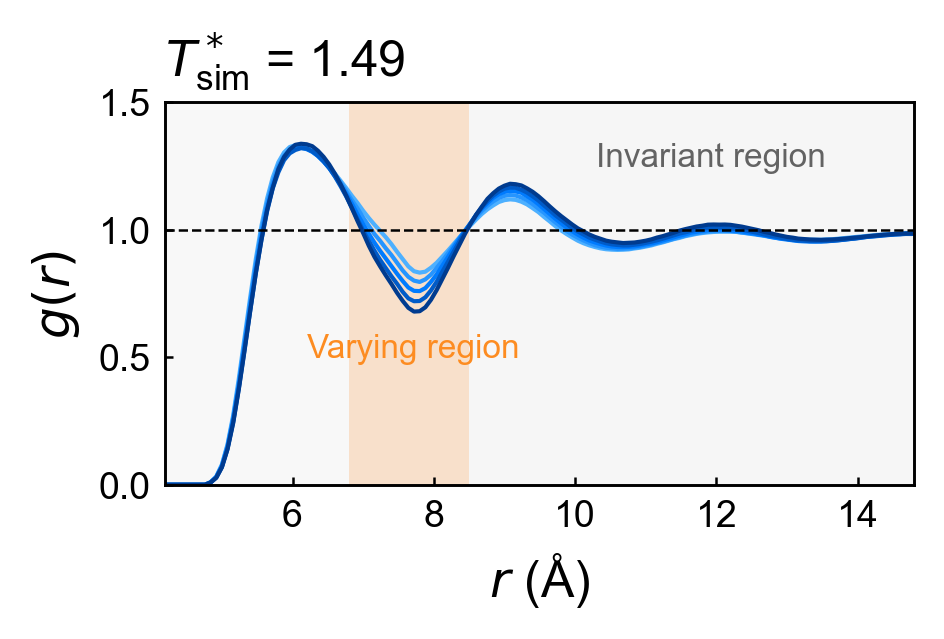

/tmp/ipykernel_2838304/3492432522.py:134: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(0, 8.4, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:135: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(8.4, 9.7, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:136: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(9.7, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')


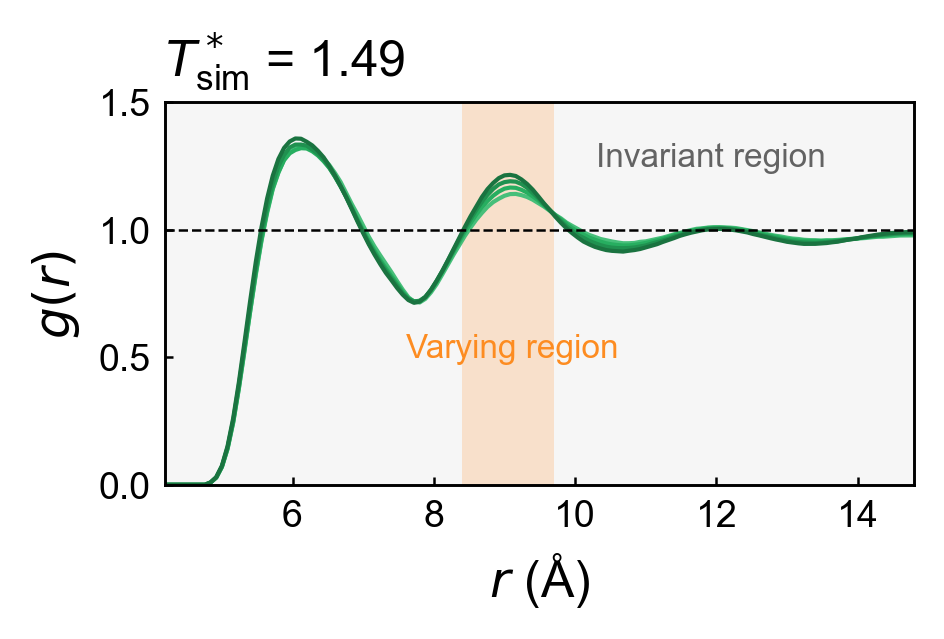

/tmp/ipykernel_2838304/3492432522.py:287: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(0, 5.6, color='#BBBBBB', alpha=0.1, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:288: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(5.6, 10, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:289: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(10, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')


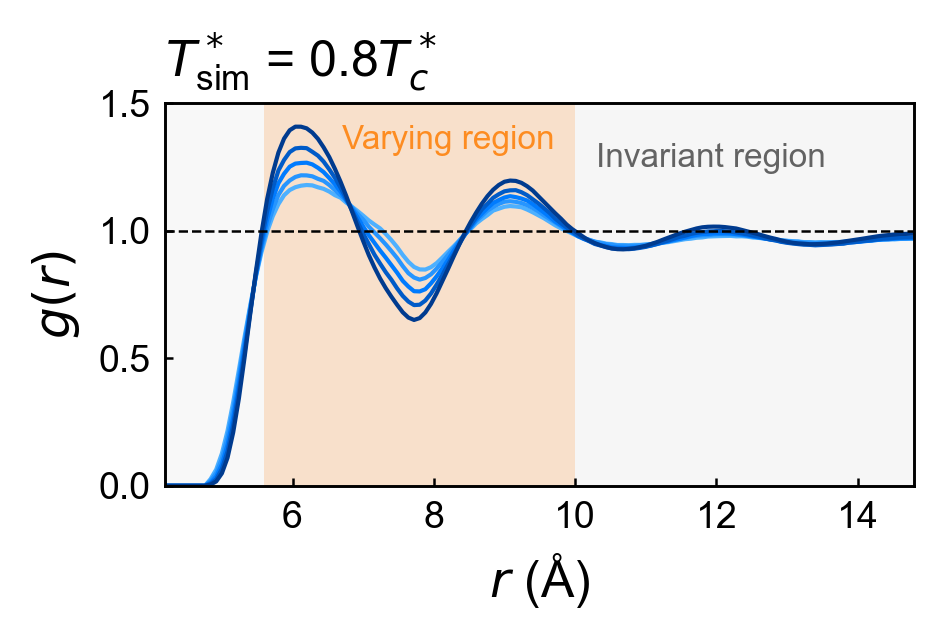

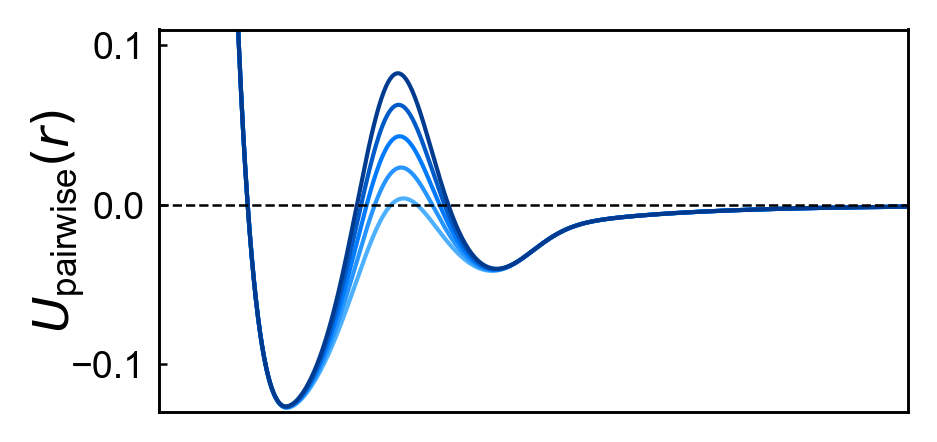

/tmp/ipykernel_2838304/3492432522.py:292: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(0, 5.6, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:293: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(5.6, 7.1, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
/tmp/ipykernel_2838304/3492432522.py:294: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax_rdf.axvspan(7.1, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')


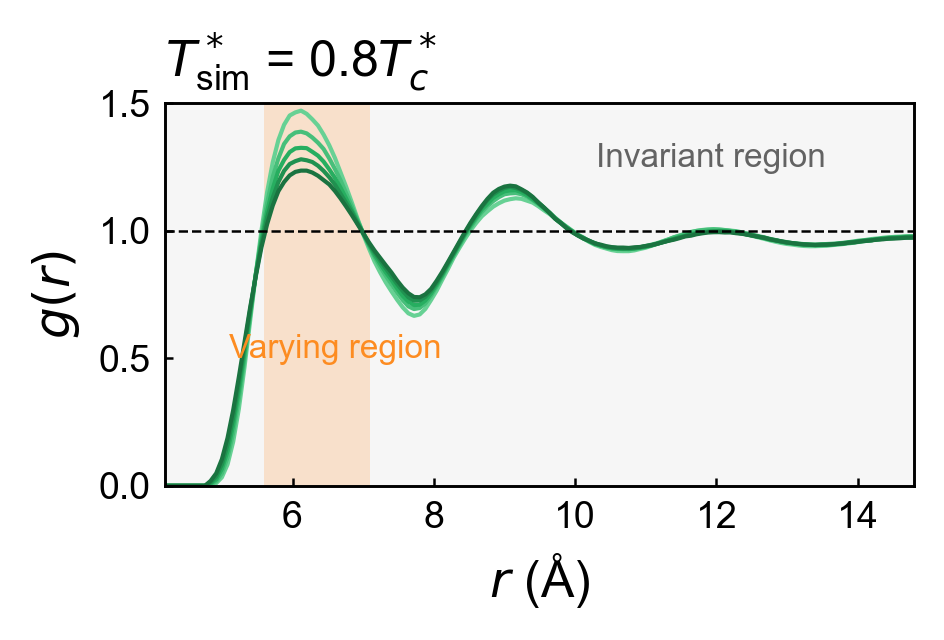

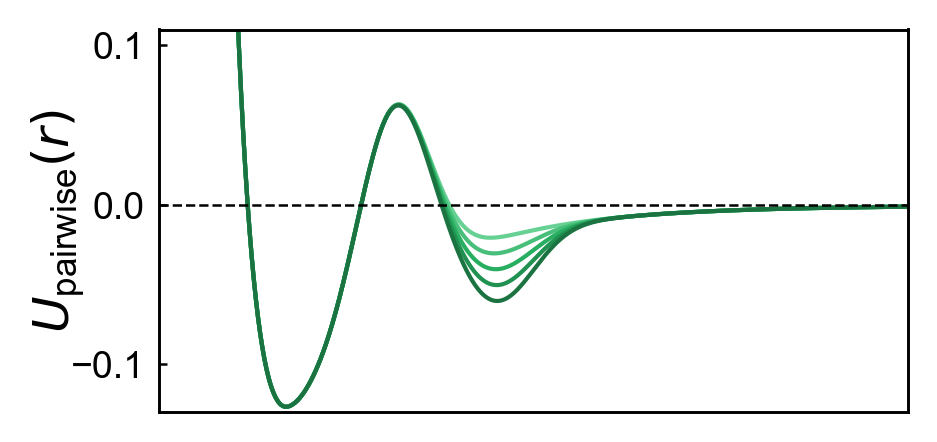

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
from matplotlib.colors import LinearSegmentedColormap, Normalize

def lj(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w):
	lj_potential = 4 * e_h * ((sigma / r)**12 - (sigma / r)**6)
	lj_potential_diff = 24 * e_h / r * (2 * (sigma / r)**12 - (sigma / r)**6)
	if r <= 2**(1.0 / 6.0) * sigma:
		V = lj_potential + (1 - lam) * e_h\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	else:
		V = lam * lj_potential\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lam * lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	return V

def plot_rdf(fixed_part, temp):

    protein = 'poly50'

    if fixed_part == 'eb':
        fixed_value = '0.12'
        param_idx, label_idx = 2, 3
        param_tag, label_tag = 'eb', '\epsilon_{\mathregular{ss}}'
    if fixed_part == 'ew':
        fixed_value = '0.02'
        param_idx, label_idx = 3, 2
        param_tag, label_tag = 'ew', '\epsilon_{\mathregular{b}}'

    subplot_size = (3.2, 3.4 / 2)
    fig_rdf, ax_rdf = plt.subplots(1, 1, figsize=subplot_size, facecolor='w', dpi=300)
    fig_rdf.subplots_adjust(top=0.95, bottom=0.2, left=0.15, right=0.93)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'

    cal2j = 4.184

    if os.path.exists(f'traj/{protein}/data0/param_{fixed_part}_{temp}.npy'):
        PARAM = np.load(f'traj/{protein}/data0/param_{fixed_part}_{temp}.npy')
        XAXIS = np.load(f'traj/{protein}/data0/xaxis_{fixed_part}_{temp}.npy')
        RDF = np.load(f'traj/{protein}/data0/rdf_{fixed_part}_{temp}.npy')
    else:
        folders = os.listdir('traj/' + protein)
        folders.sort()
        PARAM, XAXIS, RDF, PMF = [], [], [], []
        for folder in folders:
            param = folder.split('_')
            if len(param) == 1:  # removing HPS model or not
                continue
            if param[param_idx] != fixed_value:
                continue
            if param[1] != '0.20':
                continue
            print(folder)
            des_param = float(param[label_idx])
            PARAM.append(des_param)
            T_sim = int(temp)

            traj_folder = 'traj/' + protein + '/' + folder + '/' + str(T_sim) + '/'
            data_folder = 'data/' + protein + '/' + folder + '/'
            u = mda.Universe(traj_folder + '%i.gsd' % T_sim, traj_folder + '%i.dcd' % T_sim)
            nlen = len(u.trajectory)
            natoms = u.atoms.n_atoms
            nchains = int(natoms / 50)
            mass = u.atoms.masses
            box = u.dimensions
            lenx, leny, lenz = box[0], box[1], box[2]

            rhoave = np.load(data_folder + '%i_dp.npy' % T_sim)
            rho_max = max(rhoave)
            rho_min = min(rhoave)
            rho_hd, rho_ld = 0, 0
            count_hd, count_ld = 0, 0
            for rho in rhoave:
                if rho >= rho_max * 0.95:
                    rho_hd += rho
                    count_hd += 1
                if rho <= rho_min + 50:
                    rho_ld += rho
                    count_ld += 1
            rho_hd /= count_hd
            rho_ld /= count_ld

            rho0 = sum(mass) / (lenx * leny * lenz * 6.02214e-1)

            ag = u.select_atoms('all')
            rdf = mda.analysis.rdf.InterRDF(ag, ag, range=[0, 1.6], nbins=50, exclude_same=None)
            rdf.run()

            g_r = rdf.rdf * rho0 / rho_hd
            r = rdf.bins
            g_r[r < 0.48] = 0

            # Save the simulation result
            XAXIS.append(r)
            RDF.append(g_r)
            # PMF.append(-8.314e-3*T_sim*np.log(rdf.rdf)/cal2j)
        np.save(f'traj/{protein}/data0/param_{fixed_part}_{temp}.npy', np.array(PARAM))
        np.save(f'traj/{protein}/data0/xaxis_{fixed_part}_{temp}.npy', np.array(XAXIS))
        np.save(f'traj/{protein}/data0/rdf_{fixed_part}_{temp}.npy', np.array(RDF))

    if fixed_part == 'eb':
        cmap_full = LinearSegmentedColormap.from_list("vibrant_green", ["#82E0AA", "#27AE60", "#145A32"], N=256)
    if fixed_part == 'ew':
        cmap_full = LinearSegmentedColormap.from_list("vibrant_blue", ["#6EC6FF", "#007BFF", "#002060"], N=256)
    clist = cmap_full(np.linspace(0.15, 0.85, len(PARAM)))

    for i in range(len(PARAM)):
        if i == 0 and fixed_part == 'eb':
            continue
        ax_rdf.plot(XAXIS[i] * 10, RDF[i], label=r'%.2f' % (PARAM[i]), color=clist[i], lw=1)
    
    ax_rdf.axhline(y=1, color='k', linestyle='--', linewidth=0.6)

    if fixed_part == 'ew':
        ax_rdf.axvspan(0, 6.8, color='#BBBBBB', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(6.8, 8.5, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(8.5, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.text(6.2, 0.5, 'Varying region', fontsize=8, color='#FD8C21')
    if fixed_part == 'eb':
        ax_rdf.axvspan(0, 8.4, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(8.4, 9.7, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(9.7, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.text(7.6, 0.5, 'Varying region', fontsize=8, color='#FD8C21')
    ax_rdf.text(10.3, 1.25, 'Invariant region', fontsize=8, color='#636363')
    ax_rdf.text(0, 1.07, r'$T_\mathregular{sim}^*$ = 1.49', fontsize=12, transform=ax_rdf.transAxes)

    ax_rdf.set_xlim(4.2, 14.8)
    ax_rdf.set_ylim(0, 1.5)
    ax_rdf.set_xlabel('$r$ ($\mathregular{\AA}$)', fontsize=12)
    ax_rdf.set_ylabel(r'$g(r)$', fontsize=12, labelpad=4)
    ax_rdf.tick_params(labelsize=9, direction='in', length=2, width=0.6)
    ax_rdf.spines['top'].set_linewidth(0.7)
    ax_rdf.spines['left'].set_linewidth(0.7)
    ax_rdf.spines['right'].set_linewidth(0.7)
    ax_rdf.spines['bottom'].set_linewidth(0.7)

    fig_rdf.savefig(
        f"../../figures/sup2:rdf/rdf_{fixed_part}.svg",
        format='svg',
        bbox_inches='tight',
    )
    plt.show()

def plot_rdf_scale(fixed_part, temp_idx):

    if fixed_part == 'eb':
        fixed_value = '0.12'
        param_idx, label_idx = 2, 3
        param_tag, label_tag = 'eb', '\epsilon_{\mathregular{ss}}'
    if fixed_part == 'ew':
        fixed_value = '0.02'
        param_idx, label_idx = 3, 2
        param_tag, label_tag = 'ew', '\epsilon_{\mathregular{b}}'

    subplot_size = (3.2, 3.4 / 2)
    fig_rdf, ax_rdf = plt.subplots(1, 1, figsize=subplot_size, facecolor='w', dpi=300)
    fig_rdf.subplots_adjust(top=0.95, bottom=0.2, left=0.15, right=0.93)
    fig_pot, ax_pot = plt.subplots(1, 1, figsize=subplot_size, facecolor='w', dpi=300)
    fig_pot.subplots_adjust(top=0.95, bottom=0.2, left=0.15, right=0.93)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'

    cal2j = 4.184

    temp_list = {'0.06':[171, 200, 229, 257], '0.08':[156, 182, 209, 234],
                '0.10':[139, 162, 185, 209], '0.12':[125, 146, 167, 188],
                '0.14':[112, 130, 149, 167], '0.04':[156, 182, 208, 234],
                '0.03':[140, 163, 186, 209], '0.02':[125, 146, 167, 188],
                '0.01':[111, 130, 148, 167], '0.00':[ 97, 113, 129, 145]}

    if os.path.exists(f'traj/poly50/data0/param_{fixed_part}_scale_{temp_idx}.npy'):
        PARAM = np.load(f'traj/poly50/data0/param_{fixed_part}_scale_{temp_idx}.npy')
        XAXIS = np.load(f'traj/poly50/data0/xaxis_{fixed_part}_scale_{temp_idx}.npy')
        RDF = np.load(f'traj/poly50/data0/rdf_{fixed_part}_scale_{temp_idx}.npy')
    else:
        folders = os.listdir('traj/poly50')
        folders.sort()
        PARAM, XAXIS, RDF, PMF = [], [], [], []
        for folder in folders:
            param = folder.split('_')
            if len(param) == 1: # removing HPS model or not
                continue
            if param[param_idx] != fixed_value:
                continue
            if param[1] != '0.20':
                continue
            print(folder)
            des_param = float(param[label_idx])
            PARAM.append(des_param)
            T_sim = temp_list[param[label_idx]][temp_idx] # scale_factor * Tc
            print(T_sim)

            traj_folder = f'traj/poly50/{folder}/{T_sim}'
            data_folder = f'data/poly50/{folder}'
            u = mda.Universe(f'{traj_folder}/{T_sim}.gsd', f'{traj_folder}/{T_sim}.dcd')
            nlen = len(u.trajectory)
            natoms = u.atoms.n_atoms
            nchains = int(natoms / 50)
            mass = u.atoms.masses
            box = u.dimensions
            lenx, leny, lenz = box[0], box[1], box[2]

            rhoave = np.load(f'{data_folder}/{T_sim}_dp.npy')
            rho_max = max(rhoave)
            rho_min = min(rhoave)
            rho_hd, rho_ld = 0, 0
            count_hd, count_ld = 0, 0
            for rho in rhoave:
                if rho >= rho_max * 0.95:
                    rho_hd += rho
                    count_hd += 1
                if rho <= rho_min + 50:
                    rho_ld += rho
                    count_ld += 1
            rho_hd /= count_hd
            rho_ld /= count_ld

            rho0 = sum(mass) / (lenx * leny * lenz * 6.02214e-1)

            ag = u.select_atoms('all')
            rdf = mda.analysis.rdf.InterRDF(ag, ag, range=[0, 1.6], nbins=200, exclude_same=None)
            rdf.run()

            g_r = rdf.rdf * rho0 / rho_hd
            r = rdf.bins
            g_r[r < 0.48] = 0

            ## Save the simulation result
            XAXIS.append(r)
            RDF.append(g_r)
            # PMF.append(-8.314e-3*T_sim*np.log(rdf.rdf)/cal2j)
        np.save(f'traj/poly50/data0/param_{fixed_part}_scale_{temp_idx}.npy', np.array(PARAM))
        np.save(f'traj/poly50/data0/xaxis_{fixed_part}_scale_{temp_idx}.npy', np.array(XAXIS))
        np.save(f'traj/poly50/data0/rdf_{fixed_part}_scale_{temp_idx}.npy', np.array(RDF))
    
    if fixed_part == 'eb':
        Elist = [0.00, 0.01, 0.02, 0.03, 0.04]
        cmap_full = LinearSegmentedColormap.from_list("vibrant_green", ["#82E0AA", "#27AE60", "#145A32"], N=256)
    if fixed_part == 'ew':
        Elist = [0.06, 0.08, 0.10, 0.12, 0.14]
        cmap_full = LinearSegmentedColormap.from_list("vibrant_blue", ["#6EC6FF", "#007BFF", "#002060"], N=256)
    clist = cmap_full(np.linspace(0.15, 0.85, len(PARAM)))

    for i in range(len(PARAM)):
        ax_rdf.plot(XAXIS[i] * 10, RDF[i], label=r'%.2f' % (PARAM[i]), color=clist[i], lw=1)

    # Plot the potential function
    lam = 0.640
    sigma = 0.536
    r_m = 2 ** (1.0 / 6.0) * sigma
    r_b = r_m + 0.15
    r_w = r_m + 0.30
    var_b, var_w = 0.005, 0.005
    R = np.arange(0.5, 2, 0.001)
    for i in range(len(Elist)):
        V = []
        if fixed_part == 'eb':
            for r in R:
                V.append(
                    hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, 0.20, 0.12, Elist[i])
                )
        if fixed_part == 'ew':
            for r in R:
                V.append(
                    hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, 0.20, Elist[i], 0.02)
                )
        ax_pot.plot(R * 10, V, color=clist[i], ls='-', lw=1)

    ax_rdf.axhline(y=1, color='k', linestyle='--', linewidth=0.6)
    ax_pot.axhline(y=0, color='k', linestyle='--', linewidth=0.6)

    if fixed_part == 'ew':
        ax_rdf.axvspan(0, 5.6, color='#BBBBBB', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(5.6, 10, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(10, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.text(6.7, 1.32, 'Varying region', fontsize=8, color='#FD8C21')
    if fixed_part == 'eb':
        ax_rdf.axvspan(0, 5.6, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(5.6, 7.1, color='#E89B53', alpha=0.3, linewidth=0, edgecolor='none')
        ax_rdf.axvspan(7.1, 20, color='#B0B0B0', alpha=0.1, linewidth=0, edgecolor='none')
        ax_rdf.text(5.1, 0.5, 'Varying region', fontsize=8, color='#FD8C21')
    ax_rdf.text(10.3, 1.25, 'Invariant region', fontsize=8, color='#636363')
    ax_rdf.text(0, 1.07, r'$T_\mathregular{sim}^*$ = 0.8$T_c^*$', fontsize=12, transform=ax_rdf.transAxes)

    ax_rdf.set_xlim(4.2, 14.8)
    ax_rdf.set_ylim(0, 1.5)
    ax_pot.set_xlim(4.2, 14.8)
    ax_pot.set_ylim(-0.13, 0.11)
    ax_rdf.set_xlabel('$r$ ($\mathregular{\AA}$)', fontsize=12)
    ax_rdf.set_ylabel(r'$g(r)$', fontsize=12, labelpad=4)
    ax_pot.set_ylabel(r'$U_\mathregular{pairwise}(r)$', fontsize=12, labelpad=-4)
    ax_rdf.tick_params(labelsize=9, direction='in', length=2, width=0.6)
    ax_pot.tick_params(labelsize=9, direction='in', length=2, width=0.6)
    ax_pot.set_xticks([])
    ax_pot.set_yticks([-0.1, 0, 0.1])
    ax_rdf.spines['top'].set_linewidth(0.7)
    ax_pot.spines['top'].set_linewidth(0.7)
    ax_rdf.spines['left'].set_linewidth(0.7)
    ax_pot.spines['left'].set_linewidth(0.7)
    ax_rdf.spines['right'].set_linewidth(0.7)
    ax_pot.spines['right'].set_linewidth(0.7)
    ax_rdf.spines['bottom'].set_linewidth(0.7)
    ax_pot.spines['bottom'].set_linewidth(0.7)
    ax_pot.tick_params(axis='x', which='both', length=0)

    fig_rdf.savefig(
        f"../../figures/sup2:rdf/rdf_scale_{fixed_part}.svg",
        format='svg',
        bbox_inches='tight',
    )
    fig_pot.savefig(
        f"../../figures/sup2:rdf/rdf_scale_{fixed_part}_potential.svg",
        format='svg',
        bbox_inches='tight',
    )
    plt.show()

plot_rdf('ew', 150)
plot_rdf('eb', 150)
plot_rdf_scale('ew', 1)
plot_rdf_scale('eb', 1)

Processing ratio: 1.1 (epsilon=0.220)
Processing ratio: 1.2 (epsilon=0.240)
Processing ratio: 1.3 (epsilon=0.260)


/tmp/ipykernel_1015326/2748156832.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to ../../figures/sup4:rescale/0.2_0.03_analysis.png


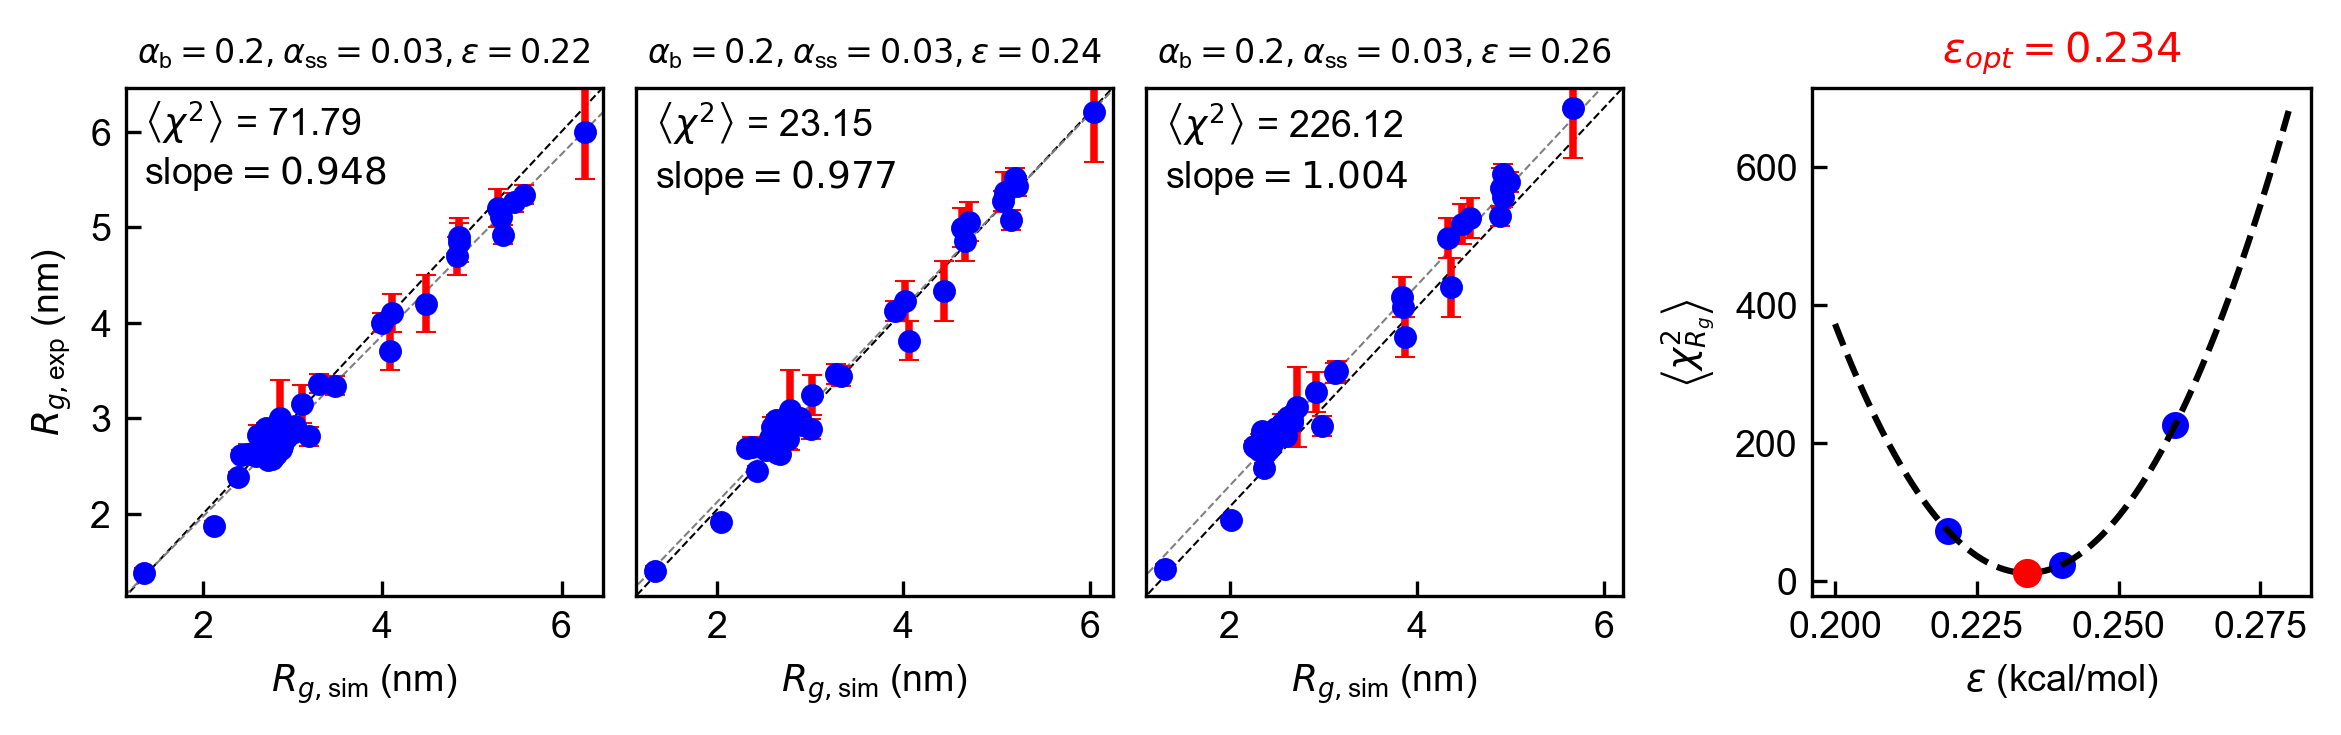

Processing ratio: 1.2 (epsilon=0.240)
Processing ratio: 1.3 (epsilon=0.260)
Processing ratio: 1.4 (epsilon=0.280)


/tmp/ipykernel_1015326/2748156832.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to ../../figures/sup4:rescale/0.3_0.03_analysis.png


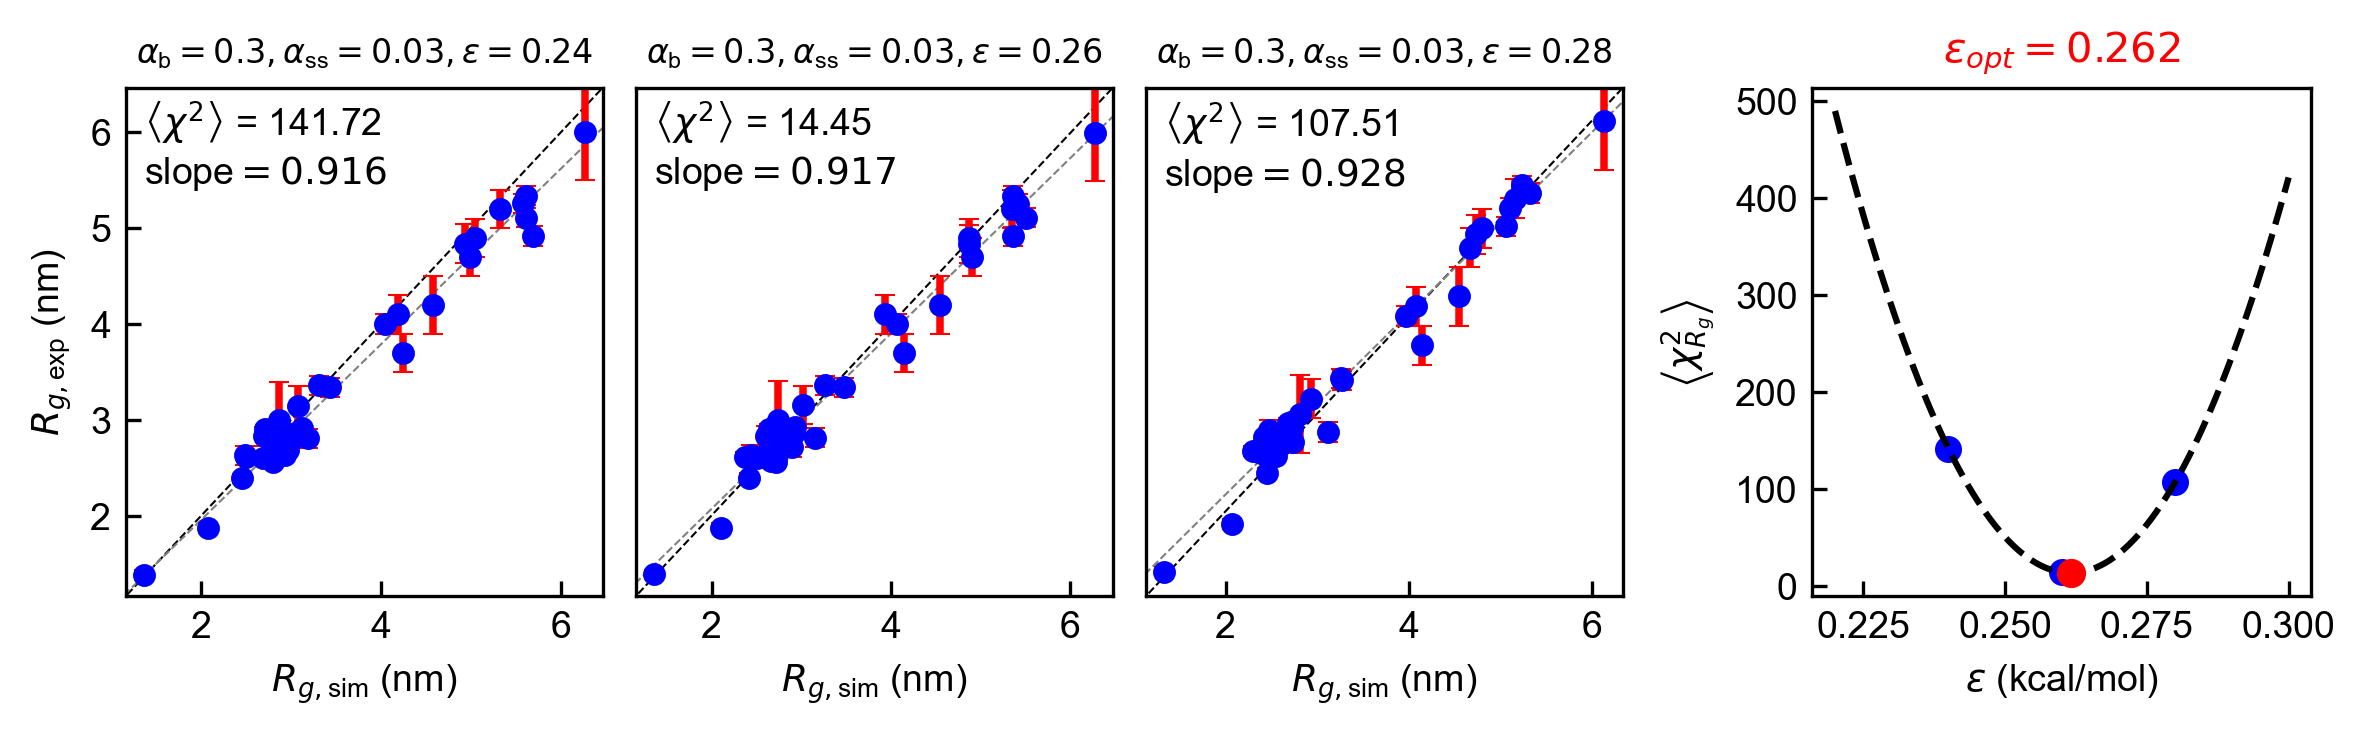

Processing ratio: 1.0 (epsilon=0.200)
Processing ratio: 1.1 (epsilon=0.220)
Processing ratio: 1.2 (epsilon=0.240)


/tmp/ipykernel_1015326/2748156832.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to ../../figures/sup4:rescale/0.2_0.06_analysis.png


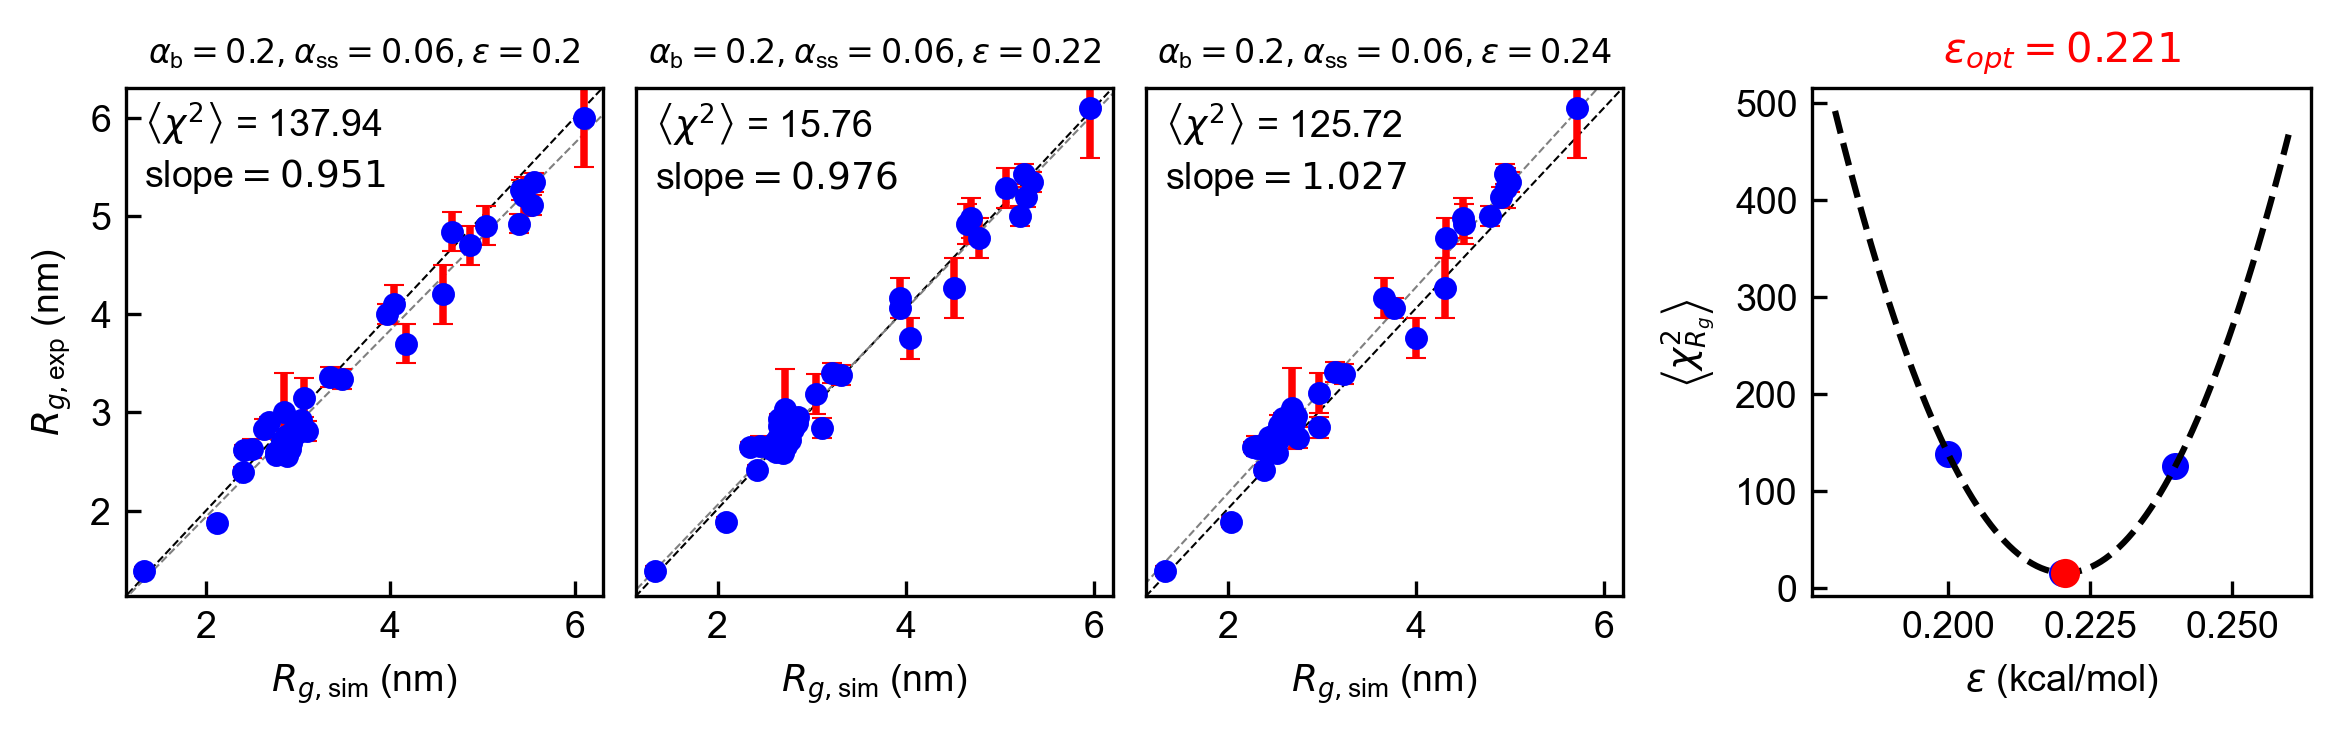

Processing ratio: 1.1 (epsilon=0.220)
Processing ratio: 1.2 (epsilon=0.240)
Processing ratio: 1.3 (epsilon=0.260)


/tmp/ipykernel_1015326/2748156832.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to ../../figures/sup4:rescale/0.3_0.06_analysis.png


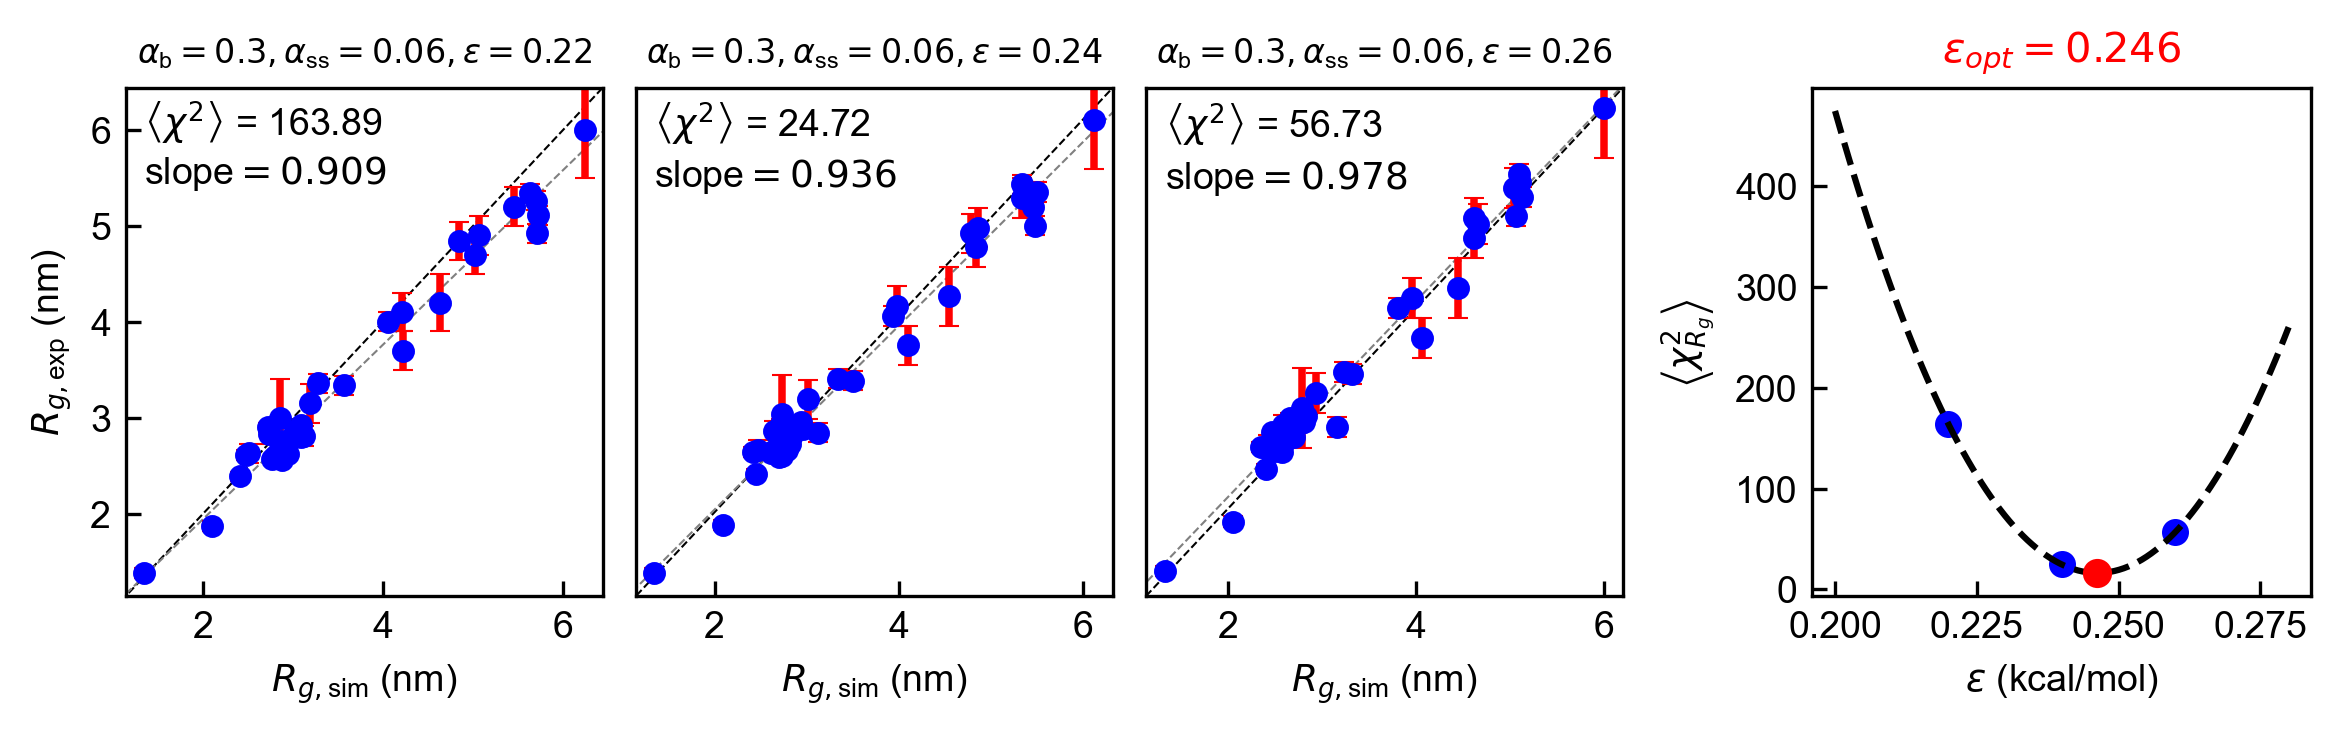

In [ ]:
# Fig.S3
import os
import sys
import numpy as np
import pandas as pd
import mdtraj as md
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as st
from decimal import Decimal

def calcRg(df, name, prot, trajfile, residues):
    # load and center gsd file
    top = md.Topology()
    chain = top.add_chain()
    for resname in prot.fasta:
        res = top.add_residue(residues.loc[resname, 'three'], chain)
        top.add_atom(residues.loc[resname, 'three'], element=md.element.carbon, residue=res)
    for i in range(len(prot.fasta)-1):
        top.add_bond(top.atom(i),top.atom(i+1))
    
    traj_path = '../rg/traj/{:s}/{:s}'.format(name, trajfile)
    if not os.path.exists(traj_path):
        raise FileNotFoundError(f"Trajectory file not found: {traj_path}")

    traj = md.load(traj_path)[100:]
    
    traj.top = top
    traj = traj.image_molecules(inplace=False, anchor_molecules=[set(traj.top.chain(0).atoms)], make_whole=True)
    traj.center_coordinates()
    traj.xyz += traj.unitcell_lengths[0,0]/2

    residue = [res.name for res in traj.top.atoms]
    masses = df.loc[residue, 'MW'].values
    masses[0] += 2
    masses[-1] += 16
    
    # calculate the center of mass
    cm = np.sum(traj.xyz*masses[np.newaxis,:,np.newaxis],axis=1)/masses.sum()
    # calculate residue-cm distances
    si = np.linalg.norm(traj.xyz - cm[:,np.newaxis,:],axis=2)
    # calculate rg
    rgarray = np.sqrt(np.sum(si**2*masses,axis=1)/masses.sum())
    rg = rgarray.mean()
    chi2_rg = np.power((prot.expRg-rg)/prot.expRgErr, 2)
    
    return rg, prot.expRg, chi2_rg

def run_calvados_analysis(alpha_b, alpha_w, ratios):
    """
    Args:
        alpha_b (str or float): Alpha_b parameter
        alpha_w (str or float): Alpha_w parameter
        ratios (list): List of ratio parameters
    """
    alpha_b = str(alpha_b)
    alpha_w = str(alpha_w)
    ratios = [str(r) for r in ratios]
    
    nparam = len(ratios)
    
    total_width = 2.2 * nparam + 2.8 
    fig = plt.figure(figsize=[total_width, 2.2], facecolor='w', dpi=300)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['font.family'] = 'sans-serif'
    gs_master = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[nparam, 1], wspace=0.19)
    gs_left = gs_master[0].subgridspec(1, nparam, wspace=0.07)
    ax_last = fig.add_subplot(gs_master[1])
    
    ax = []
    for i in range(nparam):
        ax.append(fig.add_subplot(gs_left[i]))

    try:
        proteins = pd.read_pickle('../seq/allproteins.pkl')
        residues = pd.read_csv('../residues.csv').set_index('one', drop=False)
        df = pd.read_csv('../residues.csv').set_index('three')
    except FileNotFoundError:
        print("Error: Could not find data files (../seq/allproteins.pkl or ../residues.csv).")
        return

    chi2_means_list = []
    epsilon_list = []

    for i in range(nparam):
        ratio = ratios[i]
        trajfile = '{:s}_{:s}_{:s}.gsd'.format(alpha_b, alpha_w, ratio)
        
        current_epsilon = float(ratio) * 0.2
        epsilon_list.append(current_epsilon)

        RG_SIM, RG_EXP, CHI2, ERR_EXP = [], [], [], []
        
        print(f"Processing ratio: {ratio} (epsilon={current_epsilon:.3f})")

        for name in proteins.index:
            path_check = '../rg/traj/{:s}/'.format(name)
            
            if not os.path.exists(path_check) or np.isnan(proteins.loc[name].expRg):
                continue
            
            try:
                rgSim, rgExp, chi2_rg = calcRg(df, name, proteins.loc[name], trajfile, residues)
            except Exception as e:
                # print(f"Skipping {name}: {e}")
                continue

            if rgSim > 100:
                continue
            
            RG_SIM.append(rgSim)
            RG_EXP.append(rgExp)
            CHI2.append(chi2_rg)
            ERR_EXP.append(proteins.loc[name].expRgErr)

        if not RG_SIM:
            print(f"Warning: No valid data found for ratio {ratio}")
            chi2_means_list.append(np.nan)
            continue

        mean_chi2 = np.mean(CHI2)
        chi2_means_list.append(mean_chi2)
        
        slope, intercept, r_value, p_value, std_err = st.linregress(RG_SIM, RG_EXP)

        ax[i].plot([0, 10], [0, 10], 'k--', linewidth=0.5)
        x_fit = np.array([0, 10])
        ax[i].plot(x_fit, x_fit*slope+intercept, linestyle='--', color='grey', linewidth=0.5)
        
        ax[i].errorbar(x=RG_SIM, y=RG_EXP, yerr=ERR_EXP, fmt='o', ecolor='r', color='b',
                       elinewidth=1.8, capsize=2.5, capthick=0.5, markersize=4.5)
        
        ax[i].set_xlabel(r'$R_{g, \mathregular{sim}}$ (nm)', fontsize=9)
        if i == 0:
            ax[i].set_ylabel(r'$R_{g, \mathregular{exp}}$ (nm)', fontsize=9)
        else:
            ax[i].set_yticks([]) 
            
        all_vals = RG_EXP + RG_SIM
        if all_vals:
            min_val, max_val = min(all_vals), max(all_vals)
            ax[i].set_xlim(min_val-0.2, max_val+0.2)
            ax[i].set_ylim(min_val-0.2, max_val+0.2)
            
            ax[i].text(min_val, max_val-0.3, r'$\left\langle\chi^2\right\rangle$ = %.2f'%(mean_chi2), fontsize=9)
            ax[i].text(min_val, max_val-0.8, r'$\mathregular{slope} = %.3f$'%(slope), fontsize=9)
        
        eps_str = str((Decimal(ratio)*Decimal('0.2')).normalize())
        ax[i].set_title(r'$\alpha_{\mathregular{b}} = %s, \alpha_{\mathregular{ss}} = %s, \varepsilon = %s$'%(alpha_b, alpha_w, eps_str), fontsize=8)
        ax[i].tick_params(labelsize=9, direction='in')

    valid_mask = ~np.isnan(chi2_means_list)
    ep_arr = np.array(epsilon_list)[valid_mask]
    ch_arr = np.array(chi2_means_list)[valid_mask]

    if len(ep_arr) >= 3:
        z = np.polyfit(ep_arr, ch_arr, 2)
        p = np.poly1d(z)
        
        ax_last.scatter(ep_arr, ch_arr, color='blue', s=30, label='Sim Data')
        
        x_min_fit = min(ep_arr) - 0.02
        x_max_fit = max(ep_arr) + 0.02
        x_smooth = np.linspace(x_min_fit, x_max_fit, 100)
        
        ax_last.plot(x_smooth, p(x_smooth), 'k--', linewidth=1.5, label='Quad Fit')
        
        a, b, c = z
        if a > 0: 
            x_min = -b / (2*a)
            y_min = a * x_min**2 + b * x_min + c
            
            ax_last.plot(x_min, y_min, 'ro', markersize=6, zorder=5)
            ax_last.set_title(r'$\epsilon_{opt} = %.3f$' % x_min, fontsize=10, color='red')
        else:
            ax_last.set_title('Fit not convex', fontsize=9)
            
    elif len(ep_arr) > 0:
        ax_last.scatter(ep_arr, ch_arr, color='blue')
        ax_last.set_title('Not enough points', fontsize=9)

    ax_last.set_xlabel(r'$\epsilon$ (kcal/mol)', fontsize=9)
    ax_last.set_ylabel(r'$\left\langle\chi^2_{R_g}\right\rangle$', fontsize=9)
    ax_last.tick_params(labelsize=9, direction='in')
    
    plt.tight_layout()
    
    save_name = '../../figures/sup4:rescale/{:s}_{:s}_analysis.png'.format(alpha_b, alpha_w)
    if not os.path.exists('fig'):
        os.makedirs('fig')
    print(f"Saving figure to {save_name}")
    plt.savefig(save_name)
    plt.show()

run_calvados_analysis(alpha_b="0.2", alpha_w="0.03", ratios=[1.1, 1.2, 1.3])
run_calvados_analysis(alpha_b="0.3", alpha_w="0.03", ratios=[1.2, 1.3, 1.4])
run_calvados_analysis(alpha_b="0.2", alpha_w="0.06", ratios=[1.0, 1.1, 1.2])
run_calvados_analysis(alpha_b="0.3", alpha_w="0.06", ratios=[1.1, 1.2, 1.3])

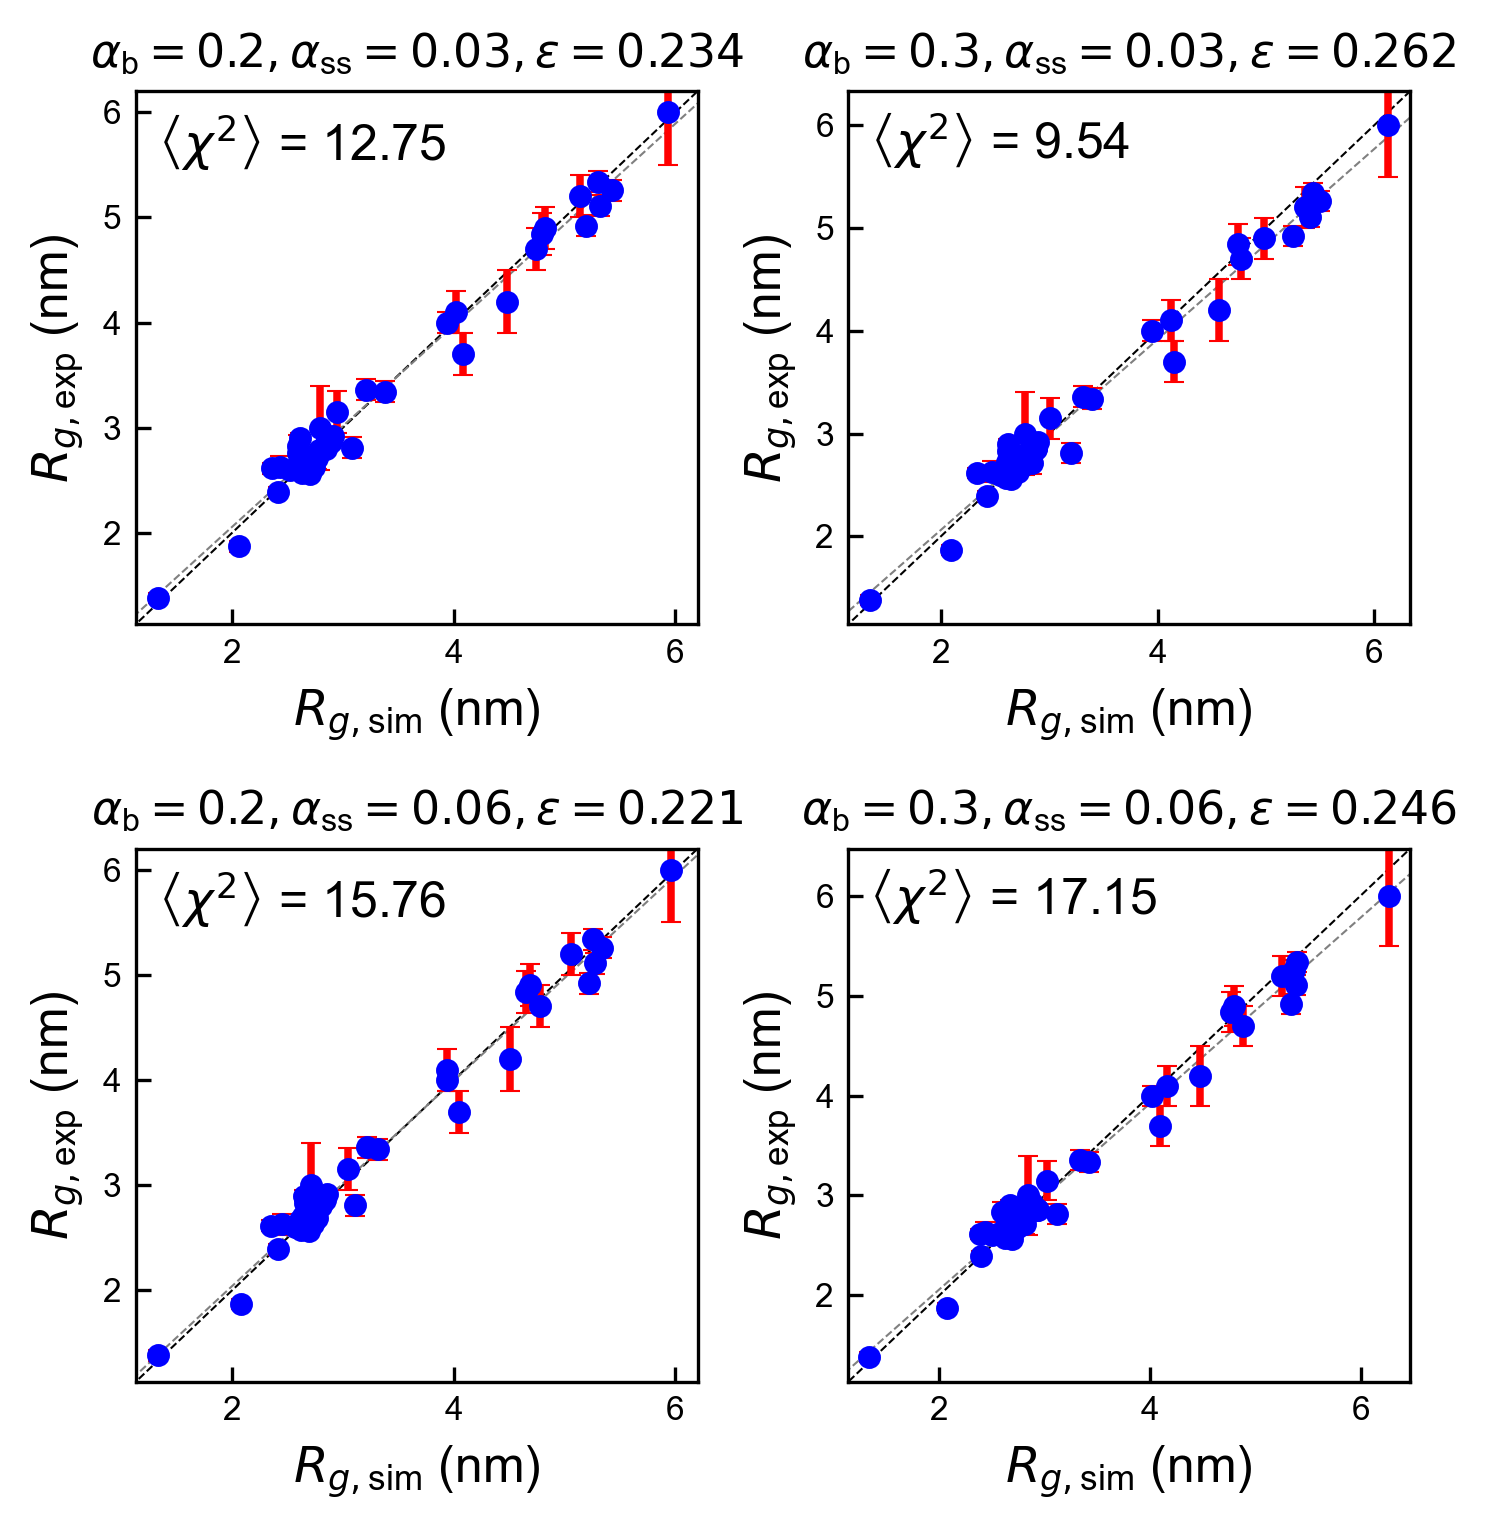

In [ ]:
# Fig.S4

import os, sys
import numpy as np
import pandas as pd
import mdtraj as md
import MDAnalysis as mda
import matplotlib.pyplot as plt
import scipy.stats as st
from decimal import Decimal

proteins = pd.read_pickle('../seq/allproteins.pkl')
residues = pd.read_csv('../residues.csv').set_index('one', drop=False)
df = pd.read_csv('../residues.csv').set_index('three')

def calcRg(df, name, prot, trajfile, residues):

    # load and center gsd file
    top = md.Topology()
    chain = top.add_chain()
    for resname in prot.fasta:
        res = top.add_residue(residues.loc[resname, 'three'], chain)
        top.add_atom(residues.loc[resname, 'three'], element=md.element.carbon, residue=res)
    for i in range(len(prot.fasta)-1):
        top.add_bond(top.atom(i),top.atom(i+1))
    traj = md.load('../rg/traj_CAL/{:s}/{:s}'.format(name, trajfile))[100:]
    traj.top = top
    traj = traj.image_molecules(inplace=False, anchor_molecules=[set(traj.top.chain(0).atoms)], make_whole=True)
    traj.center_coordinates()
    traj.xyz += traj.unitcell_lengths[0,0]/2

    residue = [res.name for res in traj.top.atoms]
    masses = df.loc[residue, 'MW'].values
    masses[0] += 2
    masses[-1] += 16
    # calculate the center of mass
    cm = np.sum(traj.xyz*masses[np.newaxis,:,np.newaxis],axis=1)/masses.sum()
    # calculate residue-cm distances
    si = np.linalg.norm(traj.xyz - cm[:,np.newaxis,:],axis=2)
    # calculate rg
    rgarray = np.sqrt(np.sum(si**2*masses,axis=1)/masses.sum())
    #rg = np.sqrt( np.power(rgarray, 2).mean() )
    rg = rgarray.mean()
    chi2_rg = np.power((prot.expRg-rg)/prot.expRgErr, 2)
    #chi2_rg = np.power((prot.expRg-rg)/(prot.expRg*0.03),2)
    return rg, prot.expRg, chi2_rg

def plot_optimized_results(ax, alpha_b, alpha_w, ratio):
    trajfile = '{:s}_{:s}_{:s}.gsd'.format(alpha_b, alpha_w, ratio)
    RG_SIM, RG_EXP, CHI2, ERR_EXP = [], [], [], []
    for name in proteins.index:
        path_check = '../rg/traj_CAL/{:s}/'.format(name)
        if not os.path.exists(path_check) or np.isnan(proteins.loc[name].expRg):
            continue
        try:
            rgSim, rgExp, chi2_rg = calcRg(df, name, proteins.loc[name], trajfile, residues)
        except:
            continue
        if rgSim > 100:
            continue
        RG_SIM.append(rgSim)
        RG_EXP.append(rgExp)
        CHI2.append(chi2_rg)
        ERR_EXP.append(proteins.loc[name].expRgErr)
    slope, intercept, r_value, p_value, std_err = st.linregress(RG_SIM, RG_EXP)
    ax.plot([0, 10], [0, 10], 'k--', linewidth=0.5)
    x_fit = np.array([0, 10])
    ax.plot(x_fit, x_fit*slope+intercept, linestyle='--', color='grey', linewidth=0.5)
    ax.errorbar(x=RG_SIM, y=RG_EXP, yerr=ERR_EXP, fmt='o', ecolor='r', color='b', elinewidth=1.8,\
             capsize=2.5, capthick=0.5, markersize=4.5)
    ax.set_xlabel(r'$R_{g, \mathregular{sim}}$ (nm)', fontsize=12)
    ax.set_ylabel(r'$R_{g, \mathregular{exp}}$ (nm)', fontsize=12)
    ax.set_xlim(min(min(RG_EXP), min(RG_SIM))-0.2, max(max(RG_EXP), max(RG_SIM))+0.2)
    ax.set_ylim(min(min(RG_EXP), min(RG_SIM))-0.2, max(max(RG_EXP), max(RG_SIM))+0.2)
    ax.text(min(min(RG_EXP), min(RG_SIM)), max(max(RG_EXP), max(RG_SIM))-0.45,\
            r'$\left\langle\chi^2\right\rangle$ = %.2f'%(np.mean(CHI2)), fontsize=12)
    ax.set_title(r'$\alpha_{\mathregular{b}} = %s, \alpha_{\mathregular{ss}} = %s, \varepsilon = %s$'%(alpha_b, alpha_w, str((Decimal(ratio)*Decimal('0.2')).normalize())), fontsize=11)
    ax.tick_params(labelsize=8, direction='in')

fig, ax = plt.subplots(2, 2, figsize=[4.9, 5.2], facecolor='w', dpi=300)
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.family'] = 'sans-serif'
plot_optimized_results(ax[0, 0], "0.2", "0.03", "1.17")
plot_optimized_results(ax[0, 1], "0.3", "0.03", "1.31")
plot_optimized_results(ax[1, 0], "0.2", "0.06", "1.105")
plot_optimized_results(ax[1, 1], "0.3", "0.06", "1.23")
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.tight_layout()
plt.show()

/home/swalker/.conda/envs/cg2all/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


2.757906045121574
3.35404492030628
3.385054528449549
3.1166606806716723
3.1615750015718946


/tmp/ipykernel_1015326/2316825016.py:59: RuntimeWarning: invalid value encountered in power
  return A * (Tc - T)**beta - delta_rho


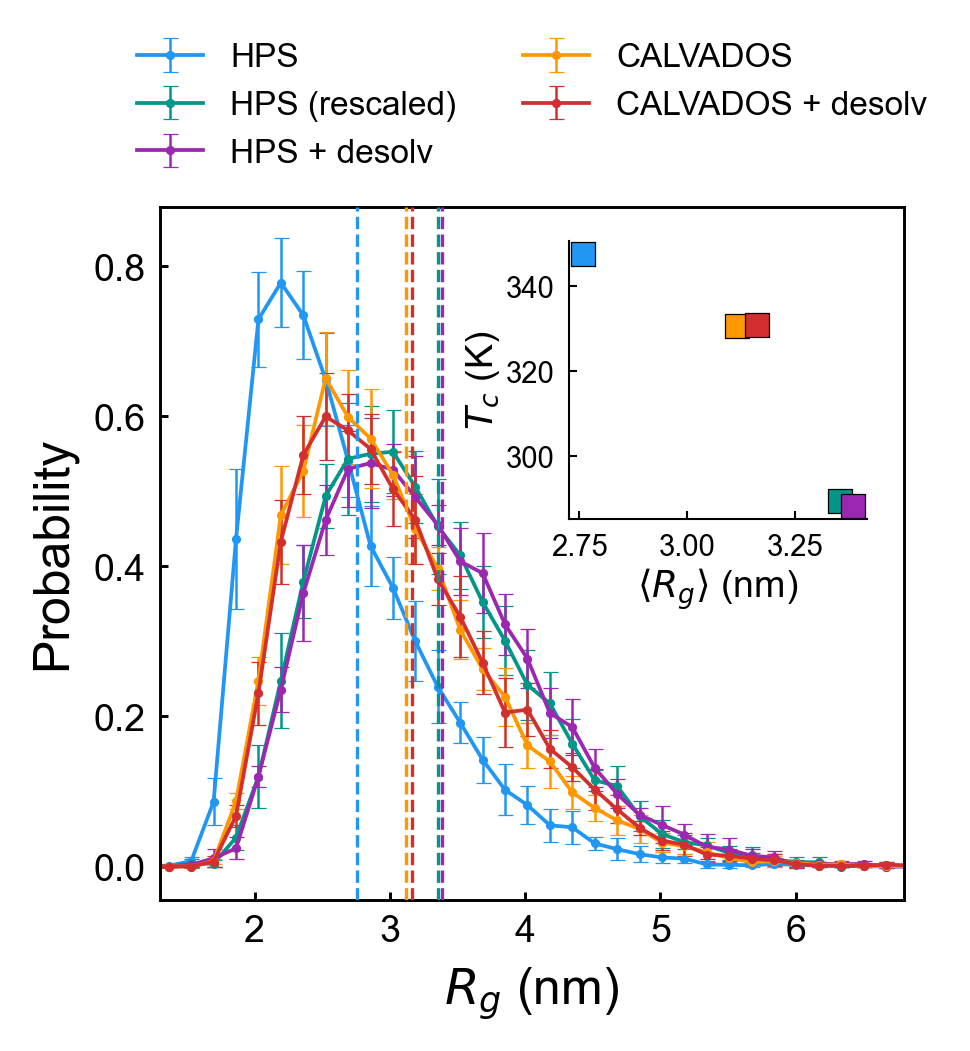

In [ ]:
# Fig.S5

import os
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def plot_rg_distribution(dir, color, label):
    nbins = 35
    dist = np.zeros((10, nbins))
    rgs = []
    for irep in range(10):
        traj_dir = f'{dir}/replica_{irep}'
        u = mda.Universe(f'{traj_dir}.gsd', f'{traj_dir}.dcd')
        chain = u.select_atoms('all')
        nlen = len(u.trajectory)
        rg = np.zeros(nlen)
        for tdx, ts in enumerate(u.trajectory):
            mda.lib.mdamath.make_whole(chain)
            rg[tdx] = chain.radius_of_gyration()
        dist[irep, :], _ = np.histogram(rg, bins=nbins, range=(1.2, 7), density=True)
        rgs.append(np.mean(rg))
    dist_avg = np.mean(dist, axis=0)
    dist_std = np.std(dist, axis=0)
    bins = np.linspace(1.2, 7, nbins+1)
    ax.errorbar(bins[:-1], dist_avg, yerr=dist_std, color=color, fmt='-o', linewidth=0.9, markersize=1.2, capsize=1.8, capthick=0.3, elinewidth=0.6, label=label)
    rg_avg = np.sum(dist_avg * bins[:-1])/np.sum(dist_avg)
    rg_avg = np.mean(rgs)
    print(rg_avg)
    ax.axvline(rg_avg, color=color, linestyle='--', lw=0.8, zorder=100)
    return rg_avg

HPS_dir = '../rg/traj/FUS/HPS'
HPS_scale_dir = '../rg/traj/FUS/HPS_0.16'
HPSdes_dir = '../rg/traj/FUS/HPS_0.33_0.06_1.0'
CALVADOS_dir = '../rg/traj/FUS/CALVADOS'
CALVADOSdes_dir = '../rg/traj/FUS/CALVADOS_0.3_0.03_1.31'
labels = ['HPS', 'HPS (rescaled)', 'HPS + desolv', 'CALVADOS', 'CALVADOS + desolv']

fig, ax = plt.subplots(1, 1, figsize=[3.2, 3], facecolor='w', dpi=300)
clist = ['#2196F3', '#009688', '#9C27B0', '#FF9800', '#D32F2F']
Rg_list = []
for i, traj_dir in enumerate([HPS_dir, HPS_scale_dir, HPSdes_dir, CALVADOS_dir, CALVADOSdes_dir]):
    rg_avg = plot_rg_distribution(traj_dir, clist[i], labels[i])
    Rg_list.append(rg_avg)
plt.legend(fontsize=8, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.28), frameon=False)
plt.xlim(1.3, 6.8)
plt.xlabel(r'$R_g$ (nm)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.tick_params(labelsize=9, direction='in', length=2, width=0.7)
for spine in ax.spines.values():
    spine.set_linewidth(0.7)

# rg vs. tc
def err_Tc(param, T, delta_rho):
    A, Tc = param
    beta = 0.325
    return A * (Tc - T)**beta - delta_rho

def err_rhoc(param, T, rho_ave):
    B, C = param
    return rho_ave - (B + C * T)

Tc_list = []
slab_folders = ['hps', 'HPS_0.16', 'des_0.2_0.066_0.012','CALVADOS', 'CAL_0.262_0.0786_0.00786']
for i, slab_folder in enumerate(slab_folders):
    data_folder = f'data/FUS/{slab_folder}'
    RHO_H, RHO_L, T = [], [], []
    for temp in range(200, 360, 10):
        traj_folder = f'traj/FUS/{slab_folder}/{temp}'
        if not os.path.exists(traj_folder):
            continue
        u = mda.Universe(f'{traj_folder}/{temp}.gsd', f'{traj_folder}/{temp}.dcd')
        nlen = len(u.trajectory)
        natoms = u.atoms.n_atoms
        mass = u.atoms.masses
        name = u.atoms.names
        box = u.dimensions
        lenx, leny, lenz = box[0], box[1], box[2]
        zmax, zmin = lenz / 2, - lenz / 2
        nbins = 500
        nres = 168
        dz = lenz / nbins
        axisz = np.linspace(zmin, zmax, nbins)

        if os.path.exists(f'{data_folder}/{temp}_dp.npy'):
            rhoave = np.load(f'{data_folder}/{temp}_dp.npy')
        else:
            count = 0
            rhosum = np.zeros(nbins)
            for frame in np.arange(0, nlen, 1):
                if frame % 100 == 0:
                    print(frame)
                ts = u.trajectory[frame]
                cmassz = sum(ts.positions[:, 2] * mass) / sum(mass)
                massz = np.zeros(nbins)
                for i in range(natoms):
                    nposz = ts.positions[i][2] - cmassz
                    nmass = mass[i]
                    idx = int((nposz - zmin) / dz)
                    if idx >= 500:
                        idx -= 500
                    if idx < 0:
                        idx += 500
                    massz[idx] += nmass
                rhoz = massz / (lenx * leny * dz * 6.02214e-1)
                rhosum += rhoz
                count += 1
            rhoave = rhosum / count
            rhoidx = np.where(rhoave > max(rhoave) * 0.2)
            mc_idx = int(np.mean(rhoidx) - len(rhoave) / 2)
            if mc_idx > 0:
                tmp = rhoave[:mc_idx].copy()
                rhoave[:-mc_idx] = rhoave[mc_idx:]
                rhoave[-mc_idx:] = tmp
            if mc_idx < 0:
                tmp = rhoave[mc_idx:].copy()
                rhoave[-mc_idx:] = rhoave[:mc_idx]
                rhoave[:-mc_idx] = tmp
            
            if not os.path.exists(data_folder):
                os.makedirs(data_folder)
            np.save(f'{data_folder}/{temp}_dp.npy', rhoave)
        
        rho_max = max(rhoave)
        rho_min = min(rhoave)
        rho_hd, rho_ld = 0, 0
        count_hd, count_ld = 0, 0
        for rho in rhoave:
            if rho >= rho_max * 0.95:
                rho_hd += rho
                count_hd += 1
            if rho <= rho_min + 50:
                rho_ld += rho
                count_ld += 1
        rho_hd /= count_hd
        rho_ld /= count_ld

        rho_hd = np.average(rhoave[int(nbins/2-5):int(nbins/2+5)])
        rho_ld = (np.average(rhoave[:180]) + np.average(rhoave[-180:])) / 2

        if abs(rho_hd - rho_ld) <= 50:
            continue
        
        rho_hd /= np.sum(mass[:168]) * 1e-3
        rho_ld /= np.sum(mass[:168]) * 1e-3

        T.append(temp)
        RHO_H.append(rho_hd)
        RHO_L.append(rho_ld)

    tc_list, rhoc_list = {}, {}

    delta_rho = np.array(RHO_H) - np.array(RHO_L)
    rho_ave = (np.array(RHO_H) + np.array(RHO_L)) / 2
    T_prods = np.array(T)
    param = leastsq(err_Tc, [100, 400], args=(T_prods, delta_rho))
    A, T_c = param[0]
    Tc_list.append(T_c)

axin = ax.inset_axes([0.55, 0.55, 0.4, 0.4])
for i in range(len(Rg_list)):
    axin.scatter(Rg_list[i], Tc_list[i], marker='s', s=35, edgecolors='k', linewidths=0.3, color=clist[i], zorder=3)
axin.set_xlabel(r'$\langle R_g\rangle$ (nm)', fontsize=9, labelpad=1)
axin.set_ylabel(r'$T_c$ (K)', fontsize=9, labelpad=1)
axin.tick_params(labelsize=7, direction='in', length=2, width=0.5)
for spine in axin.spines.values():
    spine.set_linewidth(0.5)
axin.spines['top'].set_visible(False)
axin.spines['right'].set_visible(False)